# Artificial datasets

In [55]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Blobs

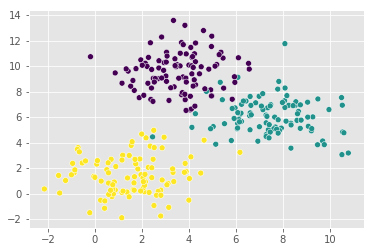

In [56]:
data_blob, label_blob = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=1.5, center_box=(0,10), random_state=42 )
data = np.concatenate([data_blob, label_blob.reshape(-1,1)],axis=1)

plt.scatter(data_blob[:, 0], data_blob[:, 1], marker='o', c=label_blob,
            s=35, edgecolor='w')

# Paper way

In [57]:
x = np.random.normal(loc=0, scale=2, size=(100)).reshape(-1, 1)
y = np.random.normal(loc=0, scale=2, size=(100)).reshape(-1, 1)
cat = np.array(['a'] * 100).reshape(-1, 1).reshape(-1, 1)
c1 = np.concatenate([x,y,cat],axis=1)

x = np.random.normal(loc=5, scale=1, size=(100)).reshape(-1, 1)
y = np.random.normal(loc=1, scale=2, size=(100)).reshape(-1, 1)
cat = np.array(['b'] * 100).reshape(-1, 1).reshape(-1, 1)
c2 = np.concatenate([x,y,cat],axis=1)

x = np.random.normal(loc=5, scale=1, size=(100)).reshape(-1, 1)
y = np.random.normal(loc=-2, scale=1, size=(100)).reshape(-1, 1)
cat = np.array(['c'] * 100).reshape(-1, 1).reshape(-1, 1)
c3 = np.concatenate([x,y,cat],axis=1)

data = np.concatenate([c1,c2,c3],axis=0)
print(data.shape)


(300, 3)


Normalized True


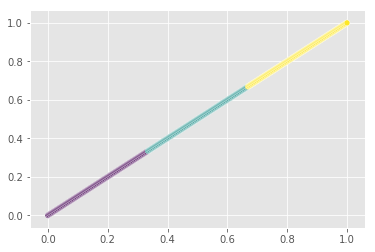

In [58]:
from MyPreprocessing import MyPreprocessing
preprocess = MyPreprocessing(normalized=True)
preprocess.fit(data)
data_paper = preprocess.new_df.values
label_paper = preprocess.labels_
plt.scatter(data_paper[:, 0], data_paper[:, 1], marker='o', c=label_paper,
            s=35, edgecolor='w')

## Add noise

In [59]:
def add_noise(noise, X, labels):
    noiseSigma = noise * X
    noisy = noiseSigma * np.random.rand(X.shape[0], X.shape[1])
    data = X + noisy
    plt.scatter(data[:, 0], data[:, 1], marker='o', c=labels,
            s=35, edgecolor='w')
    plt.savefig(f'datasets/ad_blob_{noise}.png')
    return data

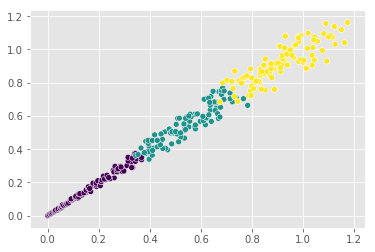

In [62]:
_ = add_noise(0.2, data_paper, label_paper)

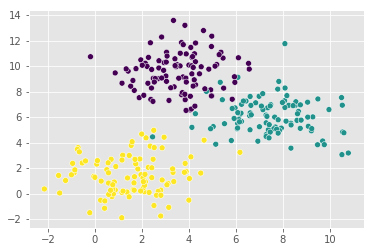

In [63]:
_ = add_noise(0, data_blob, label_blob)

## Canopy

(15, 3) (15, 15)
Canopy found 3 centers
Removed 13 data points
Remaining repetitions: 88


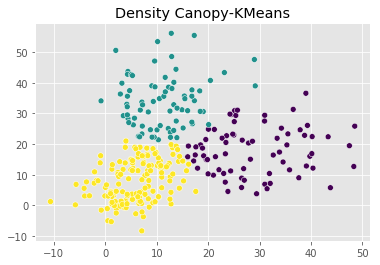

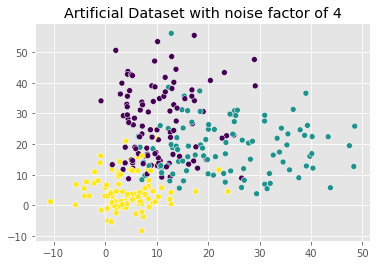

In [68]:
from MyCanopy import MyCanopy
from MyKmeans import MyKmeans
noise  = 4
data = pd.read_csv('datasets/ad_blob_4.csv').values
#data = add_noise(noise, data_blob, label_blob)
mycanopy = MyCanopy(remove_outliers=True)
mycanopy.fit(data)
clst = MyKmeans(len(mycanopy.centroids), 0.001, 100, 'canopy', mycanopy.centroids)
clst.fit(data)
plt.title(f'Density Canopy-KMeans')
plt.scatter(data[:, 0], data[:, 1], marker='o', c=clst.labels_,
            s=35, edgecolor='w')
plt.savefig(f'datasets/ad_blob_{noise}_mycanopykmeans.png')
plt.show()

plt.title(f'Artificial Dataset with noise factor of {noise}')
plt.scatter(data[:, 0], data[:, 1], marker='o', c=label_blob,
            s=35, edgecolor='w')
plt.savefig(f'datasets/ad_blob_{noise}.png')
plt.show()

(19, 2) (19, 19)
Canopy found 3 centers
Removed 18 data points


C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:22: RuntimeWarning: invalid value encountered in double_scalars
  meanDist = 2*triang_dists/(n*(n-1))
C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:54: RuntimeWarning: invalid value encountered in greater_equal
  dist_filter = dists_i>=meanDist


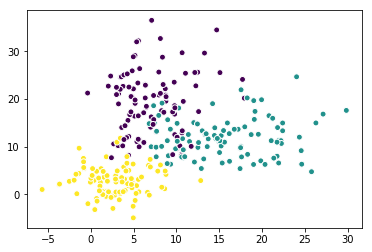

In [336]:
mycanopy = MyCanopy(remove_outliers=True)
mycanopy.fit(add_noise(2, data_blob, label_blob))

In [328]:
mycanopy = MyCanopy(remove_outliers=True)
mycanopy.fit(data_paper)

(32, 2) (32, 32)
Canopy found 2 centers
Removed 32 data points


C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:22: RuntimeWarning: invalid value encountered in double_scalars
  meanDist = 2*triang_dists/(n*(n-1))
C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:26: RuntimeWarning: invalid value encountered in less
  f = np.where((dists_i - meanDist)<0, 1, 0)
C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:31: RuntimeWarning: invalid value encountered in less
  cluster_dists = dists_i[dists_i < meanDist]
C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:36: RuntimeWarning: invalid value encountered in double_scalars
  return 2*d/(p_i*(p_i-1))


(15, 2) (15, 15)
Canopy found 2 centers
Removed 15 data points


C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:22: RuntimeWarning: invalid value encountered in double_scalars
  meanDist = 2*triang_dists/(n*(n-1))
C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:26: RuntimeWarning: invalid value encountered in less
  f = np.where((dists_i - meanDist)<0, 1, 0)
C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:31: RuntimeWarning: invalid value encountered in less
  cluster_dists = dists_i[dists_i < meanDist]
C:\Users\John.Souarlis\Documents\AI\URL\Unsupervised\Canopy_Project\canopyKmeans_improved\MyCanopy.py:36: RuntimeWarning: invalid value encountered in double_scalars
  return 2*d/(p_i*(p_i-1))


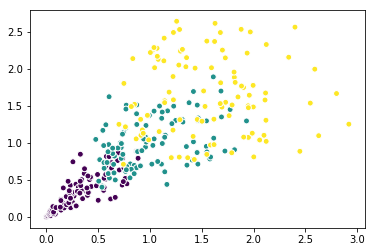

In [341]:
mycanopy = MyCanopy(remove_outliers=True)
mycanopy.fit(add_noise(2, data_paper, label_paper))

## Save Datasets

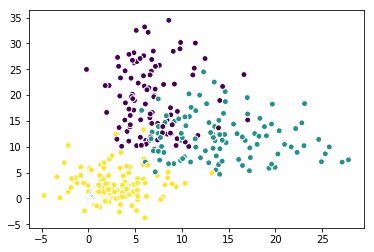

In [343]:
import pandas as pd
from sklearn.utils import shuffle

data = np.concatenate([data_blob, label_blob.reshape(-1,1)],axis=1)
pd.DataFrame(data).to_csv('datasets/ad_blob_0.csv', index=False)

data = np.concatenate([add_noise(2, data_blob, label_blob), label_blob.reshape(-1,1)],axis=1)
pd.DataFrame(data).to_csv('datasets/ad_blob_2.csv', index=False)

data = np.concatenate([data_paper, label_paper.reshape(-1,1)],axis=1)
pd.DataFrame(data).to_csv('datasets/ad_paper_0.csv', index=False)

data = np.concatenate([add_noise(2, data_paper, label_paper), label_blob.reshape(-1,1)],axis=1)
pd.DataFrame(data_paper).to_csv('datasets/ad_paper_2.csv', index=False)
#data = shuffle(pd.DataFrame(data)).to_csv('datasets/shuffle_artificial_dataset.csv', index=False)

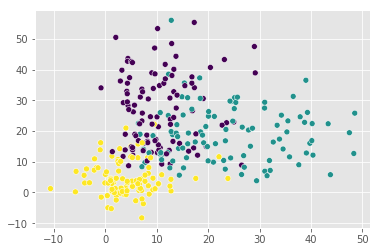

In [67]:
data = np.concatenate([add_noise(4, data_blob, label_blob), label_blob.reshape(-1,1)],axis=1)
pd.DataFrame(data).to_csv('datasets/ad_blob_4.csv', index=False)

In [69]:
np.random.rand(5, 1)

array([[0.00097145],
       [0.79975116],
       [0.31686645],
       [0.42856122],
       [0.95457806]])